#<strong> Project 1 </strong>

게임 회사의 데이터 팀에서 다음 분기에 어떤 게임을 설계해야 할지에 대한 프로젝트
 

# About Data 
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

<strong>발표에 포함되어야 하는 내용:</strong>

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [2]:
# 한글 폰트 추가
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# Abstract
게임회사에서 팀원으로서 다음 분기에 어떤 게임을 설계해야 할지에 대해서 기존에 있는 데이터를 분석과 시각화 프로세스를 통해서 결론을 내는 프로젝트를 진행합니다.

In [2]:
##### Load Data and Ready for Preprocessing #####
import pandas as pd
import numpy as np

# Read data
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)
df = df.iloc[:,1:]
print(df.shape)
df

(16598, 9)


Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16598 rows x 9 columns]

1. 지역에 따른 선호하는 장르
2. 연도별 게임의 트렌드
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
4. 게임 장르에 따른 선호하는 플랫폼
5. 연도별 게임 출고량 변화


데이터 전처리 사항:

1. 년도: 뒤에 년도만 붙은 것이 있음, 결측치는 어쩔수 없이 제거
2. Sales 값에서 1M = 1, 1000K = 1M, 즉 50K = 0.05M

In [3]:
##### 데이터 전처리
# Year 정리, 년도가 제대로 나오지 않는 년도를 정리
count = 0 # 총 몇개의 데이터가 제대로 입력이 안되어 있는지 확인
for i in range(0,len(df)):
  if df.iloc[i,2] < 100: # 년도수가 뒤에만 표기되어 있는 경우
    count = count + 1
    if df.iloc[i,2] > 50: # 1900년대 일 때 년도 정리
      df.iloc[i,2] = 1900 + df.iloc[i,2]
    elif df.iloc[i,2] < 50: # 2000년대 일 때 년도 정리
      df.iloc[i,2] = 2000 + df.iloc[i,2]

In [4]:
##### Sales 값 정리하기
# Sales 값에 존재하는 vK = v*0.001, vm = v로 교체하고, string 형태의 값을 float 형으로 전환시키는 함수 생성
def value_to_float(x): # 각 값 x
  if 'K' in x:
    if len(x) > 1:
      return float(x.replace('K',''))*0.001
  if 'M' in x:
    if len(x) > 1:
      return float(x.replace('M',''))
  if type(x) == str:
    return float(x)

# value_to_float 함수 사용하여 각 Sales 열에 적용시키기
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [5]:
# 결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
##### 결측치
# 결측치 제거, sample 의 수가 많기 때문에 missing values 를 포함하는 행을 모두 삭제한다.
# 결측치는 일일히 찾기 어려움으로 drop하여 데이터를 새로운 데이터셋 df_new에 저장
df_new = df.dropna(how = 'any') # 한 행에서 하나라도 missing value가 있으면 제거
df_new['Year'] = df_new['Year'].astype(int) # Year 열에서 float 형을 int 형으로 변환
df_new.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [7]:
##### 결측치 제거 후 결측치가 전체 데이터에서 얼마를 차지하는지 확인하기.
before = df.shape[0]
after = df_new.shape[0]
total = before - after
percentage_NA = total/before
if percentage_NA < 10:
  print("결측치는 전체 데이터에서 %.3f%%를 차지하며, 결측치는 전체 데이터의 10%% 미만이므로 제거하기로 하였다."%(percentage_NA*100))
else:
  print("결측치는 전체 데이터에서 %.3f%%를 차지한다."%(percentage_NA*100))

결측치는 전체 데이터에서 2.151%를 차지하며, 결측치는 전체 데이터의 10% 미만이므로 제거하기로 하였다.


In [8]:
# 지역에 상관없이 해당 게임에 대한 총 출고량을 합산하여 Total_Sales 열에 추가
df_new['Total_Sales'] = 0
for i in range(len(df_new)):
  sum = df_new['NA_Sales'].iloc[i] + df_new['EU_Sales'].iloc[i] + df_new['JP_Sales'].iloc[i] + df_new['Other_Sales'].iloc[i]
  df_new['Total_Sales'].iloc[i] = sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
print(df_new.shape)
df_new.reset_index(drop = True,inplace = True)
df_new.head()

(16241, 10)


Name  ... Total_Sales
0                    Candace Kane's Candy Factory  ...        0.04
1                                  The Munchables  ...        0.18
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
3                Deal or No Deal: Special Edition  ...        0.04
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25

[5 rows x 10 columns]

# 1. 지역에 따라서 선호하는 게임 장르가 다를까
1) 각 지역에서 선호하는 게임 장르를 찾아내기


In [30]:
##### 첫번째 데이터 분석 #####
# value_counts() 를 사용하여 각 컬럼에 존재하는 각각의 값의 갯수 확인 가능
genre = df_new['Genre'] # 게임 장르만 따로 추출
area = df_new.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] # 지역의 출고량만 따로 추출
year = df_new['Year'] # 연도만 따로 추출
sales = df_new['Total_Sales'] # 총 출고량 

In [31]:
# 지역에 따른 선호하는 게임 장르가 다를까
# 즉 4개의 지역과 게임 장르의 선호도 및 비교
df1 = pd.concat([year,genre,area],axis = 1) # df1 은 첫번째 데이터 분석을 위한 새로운 데이터셋을 구축
df1.head()

Year      Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0  2008     Action      0.04      0.00      0.00         0.00
1  2009     Action      0.17      0.00      0.00         0.01
2  2010  Adventure      0.00      0.00      0.02         0.00
3  2010       Misc      0.04      0.00      0.00         0.00
4  2010   Platform      0.12      0.09      0.00         0.04

Text(0.5, 1.0, '각 지역의 장르별 출고량 비교')

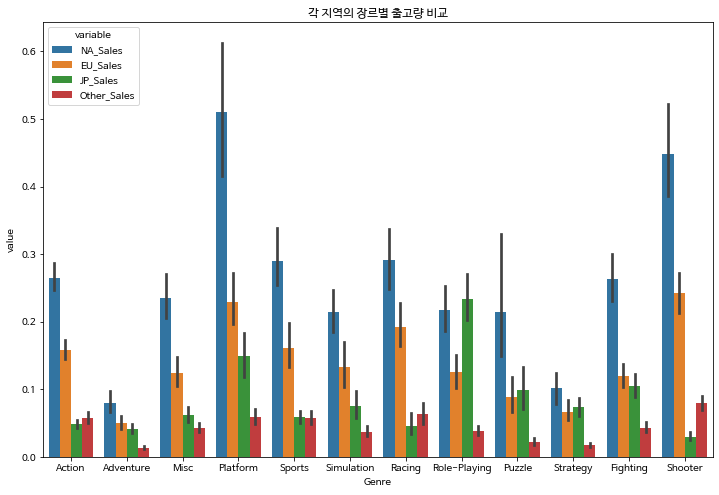

In [32]:
# df1 data set을 tidy data 로 변환, tidy1
tidy1 = df1.melt(id_vars='Genre',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

# Bar chart 로 각 지역에서 출고량이 높은 게임의 장르를 확인할 수 있다.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.barplot(data = tidy1, x = 'Genre', y = 'value',hue = 'variable')
plt.title("각 지역의 장르별 출고량 비교")

2) 근 10년간 각 지역의 장르별 평균 출고량


Text(0.5, 1.0, '2010-2020년 각 지역의 장르별 출고량 비교')

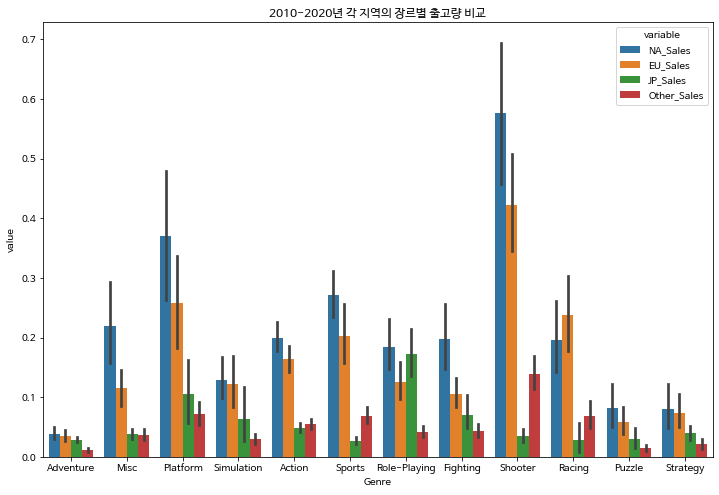

In [33]:
df1_2010 = df1[(df1['Year']>=2010) & (df1['Year']<=2020)]
tidy1_2010 = df1_2010.melt(id_vars='Genre',value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.figure(figsize = (12,8))
sns.barplot(data = tidy1_2010, x = 'Genre', y = 'value',hue = 'variable')
plt.title("2010-2020년 각 지역의 장르별 출고량 비교")

In [34]:
#tidy1.groupby(['variable','Genre']).sum()

In [35]:
print("NA에서는 Platform 게임을 가장 선호하고, EU에서는 Shooter Game, JP에서는 Role Playing을 가장 선호하며, 그 외의 다른 나라에서는 Shooter 게임을 선호한다.")

NA에서는 Platform 게임을 가장 선호하고, EU에서는 Shooter Game, JP에서는 Role Playing을 가장 선호하며, 그 외의 다른 나라에서는 Shooter 게임을 선호한다.


# 2. 연도별 게임의 트렌드가 있을까?


In [36]:
# 연도별 게임 트렌드,즉 연도와 게임 장르의 비교 분석
# 연도별 출시되는 게임의 트렌드

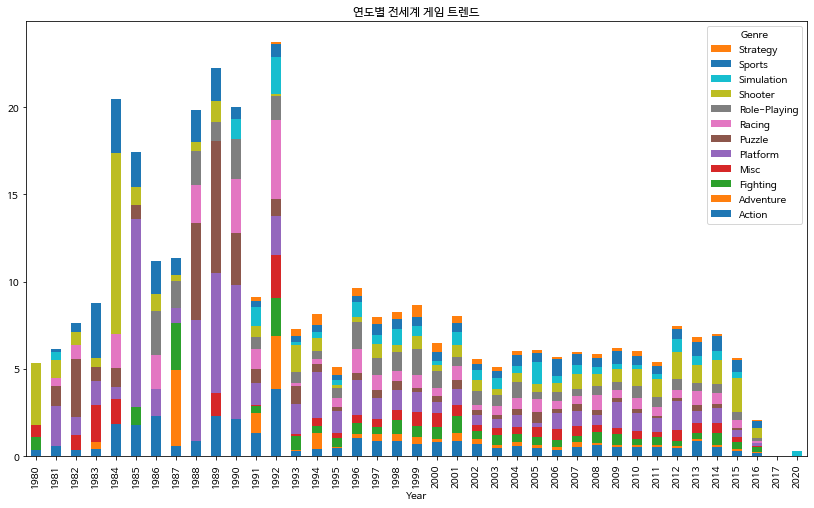

In [37]:
# 연도별 각 지역에서 매출되는 게임의 트렌드

df2 = pd.concat([year,genre,sales],axis = 1)
#tidy2 = df2.melt(id_vars=['Year','Genre'],value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

# 연도와 장르의 테이블
wide2 = df2.pivot_table(index = 'Year',columns = 'Genre',values = 'Total_Sales')
wide2 = wide2.fillna(0)

# wide2.plot() # line plot
wide2.plot.bar(stacked = True,figsize = (14,8),legend = 'reverse',title = "연도별 전세계 게임 트렌드") # 누적막대 그래프

In [38]:
# 연도별 출고량이 가장 많은 게임의 장르를 새로운 데이터 프레임에 저장
year_new = pd.DataFrame(wide2.index)
year_new['PreferGenre'] = 0
for i in range(len(wide2)):
  maxsales = wide2.iloc[i].idxmax() # 연도별 출고량이 가장 많은 게임 장르
  year_new['PreferGenre'].iloc[i] =maxsales 
year_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Year PreferGenre
0  1980     Shooter
1  1981    Platform
2  1982      Puzzle
3  1983      Sports
4  1984     Shooter

In [39]:
# 연도별 출고량이 가장 많은 장르
year_s = list()
year_s.append(year_new[(year_new['Year'] < 1985)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 1990) & (year_new['Year'] >= 1985)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 1995) & (year_new['Year'] >= 1990)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 2000) & (year_new['Year'] >= 1950)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 2005) & (year_new['Year'] >= 2000)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 2010) & (year_new['Year'] >= 2005)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 2015) & (year_new['Year'] >= 2010)].value_counts(year_new['PreferGenre']).idxmax())
year_s.append(year_new[(year_new['Year'] < 2020) & (year_new['Year'] >= 2015)].value_counts(year_new['PreferGenre']).idxmax())
year_s = pd.DataFrame(year_s,columns = ['PreferGenre'],index = ['year_early_80','year_late_80','year_early_90','year_late_90','year_early_00','year_late_00','year_early_10','year_late_10'])
year_s.T

year_early_80 year_late_80  ... year_early_10 year_late_10
PreferGenre       Shooter     Platform  ...       Shooter      Shooter

[1 rows x 8 columns]

# 3. 출고량이 높은 게임에 대한 분석

1) 전 지역에서 장르별로 출고량이 가장 높은 게임

In [45]:
##### 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 장르별 전지역 출고량이 가장 높았던 게임
df_new.loc[df_new.groupby(['Genre'])['Total_Sales'].idxmax()]

# df_new.loc[df_new.groupby(['Year'])['Total_Sales'].idxmax()] # 연도별 전지역 출고량이 가장 높은 게임


Name Platform  ...  Other_Sales Total_Sales
3414                   Grand Theft Auto V      PS3  ...         4.14       21.39
6706   Super Mario Land 2: 6 Golden Coins       GB  ...         0.29       11.18
14586             Super Smash Bros. Brawl      Wii  ...         1.02       13.04
2959                             Wii Play      Wii  ...         2.85       29.01
4113                    Super Mario Bros.      NES  ...         0.77       40.24
1187                               Tetris       GB  ...         0.58       30.26
12316                      Mario Kart Wii      Wii  ...         3.31       35.83
7673             Pokemon Red/Pokemon Blue       GB  ...         1.00       31.38
10280                           Duck Hunt      NES  ...         0.47       28.31
10914                          Nintendogs       DS  ...         2.75       24.75
2855                           Wii Sports      Wii  ...         8.46       82.74
9464                      Pokemon Stadium      N64  ...         0.09        5.45

[12 rows x 10 columns]

2) 근 10년 간 장르별 출고량이 가장 높은 게임

In [46]:
# 근 10년 간 장르별 출고량이 가장 높은 게임
year_2010 = df_new[(df_new['Year'] <= 2020)&(df_new['Year'] > 2009)]
year_2010.loc[year_2010.groupby(['Genre'])['Total_Sales'].idxmax()]

Name  ... Total_Sales
3414                         Grand Theft Auto V  ...       21.39
8171                                 L.A. Noire  ...        3.23
12581       Super Smash Bros. for Wii U and 3DS  ...        7.44
4253                         Kinect Adventures!  ...       21.82
12359                       Super Mario 3D Land  ...       10.79
4766   Mario vs. Donkey Kong: Mini-Land Mayhem!  ...        2.68
10901                              Mario Kart 7  ...       12.21
10410               Pokemon Black/Pokemon White  ...       15.32
2757             Call of Duty: Modern Warfare 3  ...       14.76
8729                  Animal Crossing: New Leaf  ...        9.10
2587                                    FIFA 16  ...        8.49
2772             StarCraft II: Wings of Liberty  ...        4.83

[12 rows x 10 columns]

In [47]:
year_2010 = df_new[(df_new['Year'] <= 2020)&(df_new['Year'] > 2009)]
Total = pd.DataFrame(year_2010.groupby(['Genre'])['Total_Sales'].mean())
Total.T

Genre          Action  Adventure  Fighting  ...  Simulation    Sports  Strategy
Total_Sales  0.466946   0.113104  0.415969  ...    0.345097  0.569912  0.213473

[1 rows x 12 columns]

3) 근 10년 간 장르별 출고량 비교

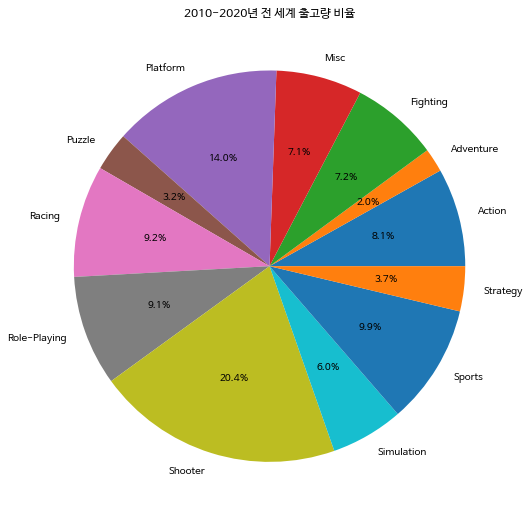

In [48]:
## 2010년대 총 출고량이 높은 게임의 장르
year_2010 = df_new[(df_new['Year'] <= 2020)&(df_new['Year'] > 2009)]
Total = year_2010.groupby(['Genre']).mean()
ratio = Total['Total_Sales']
labels = Total.index
plt.figure(figsize = (9,9))
plt.pie(ratio,labels = labels,autopct='%.1f%%')
plt.title("2010-2020년 전 세계 출고량 비율")
plt.show()

4) 근 10년간 출고량이 가장 많은 게임


In [49]:
df_new_2010 = df_new[(df_new['Year']>2009)&(df_new['Year']<=2020)]
df_new_2010.head()

Name  ... Total_Sales
2     Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
3                   Deal or No Deal: Special Edition  ...        0.04
4          Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25
6              JASF: Jane's Advanced Strike Fighters  ...        0.03
9  The Penguins of Madagascar: Dr. Blowhole Retur...  ...        0.08

[5 rows x 10 columns]

In [50]:
total_sales_2010 = df_new_2010.sort_values(by = ['Total_Sales'],ascending = False)[:10]
total_sales_2010

Name Platform  ...  Other_Sales Total_Sales
4253               Kinect Adventures!     X360  ...         1.67       21.82
3414               Grand Theft Auto V      PS3  ...         4.14       21.39
10695              Grand Theft Auto V     X360  ...         1.38       16.38
10410     Pokemon Black/Pokemon White       DS  ...         0.82       15.32
2757   Call of Duty: Modern Warfare 3     X360  ...         1.32       14.76
6119          Call of Duty: Black Ops     X360  ...         1.13       14.64
8892        Call of Duty: Black Ops 3      PS4  ...         2.31       14.24
4152       Call of Duty: Black Ops II      PS3  ...         2.52       14.04
6257       Call of Duty: Black Ops II     X360  ...         1.12       13.74
13814  Call of Duty: Modern Warfare 3      PS3  ...         1.62       13.47

[10 rows x 10 columns]

# 4. 플랫폼에 따라 선호하는 게임에 영향이 있을까
1) 게임 장르에 따른 선호하는 플랫폼

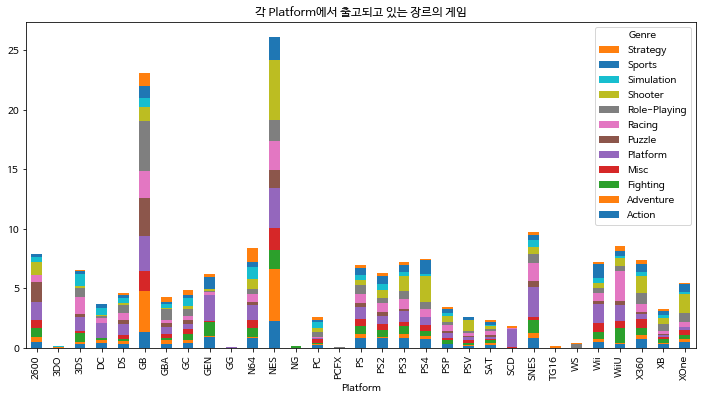

In [51]:
platform = df_new['Platform']

df4 = pd.concat([year,genre,platform,sales],axis = 1)
wide4 = df4.pivot_table(index = 'Platform',columns = 'Genre',values = 'Total_Sales')
wide4.fillna(0,inplace=True)

wide4.plot.bar(stacked = True,figsize = (12,6),legend = 'reverse',title = "각 Platform에서 출고되고 있는 장르의 게임")

In [55]:
a = pd.DataFrame(wide4.T.idxmax())
a.T
# a.groupby(['Platform']).idxmax().T

Genre Action Adventure Fighting Misc  ... Shooter Simulation Sports Strategy
0        NES       NES      NES  NES  ...     NES        N64    NES       GB

[1 rows x 12 columns]

2) 2010-2020년도의 선호하는 플랫폼

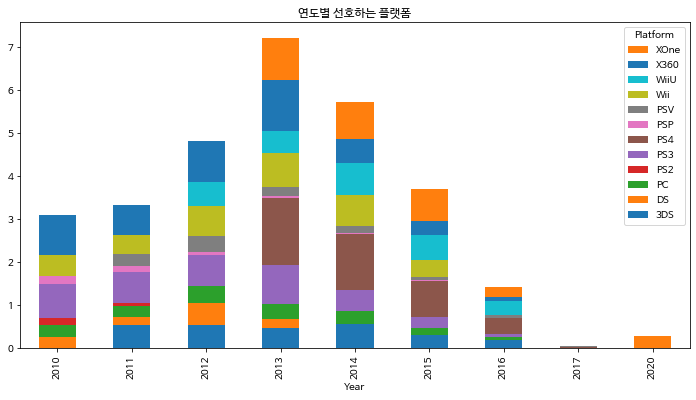

In [64]:
# 2010-2020년도 선호하는 플랫폼
wide5 = df4.pivot_table(index = 'Year',columns = 'Platform',values = 'Total_Sales')
# wide5.fillna(0,inplace=True)
wide5 = wide5[(wide5.index>2009)&(wide5.index<=2020)]
wide5 = wide5.dropna(how = 'all',axis = 1)
wide5.plot.bar(stacked = True,figsize = (12,6),legend = 'reverse',title = "연도별 선호하는 플랫폼")

In [54]:
wide5.T.idxmax()

Year
2010    X360
2011     PS3
2012    X360
2013     PS4
2014     PS4
2015     PS4
2016     PS4
2017     PS4
2020      DS
dtype: object

#### 2010-2020년도 장르별 선호하는 플랫폼

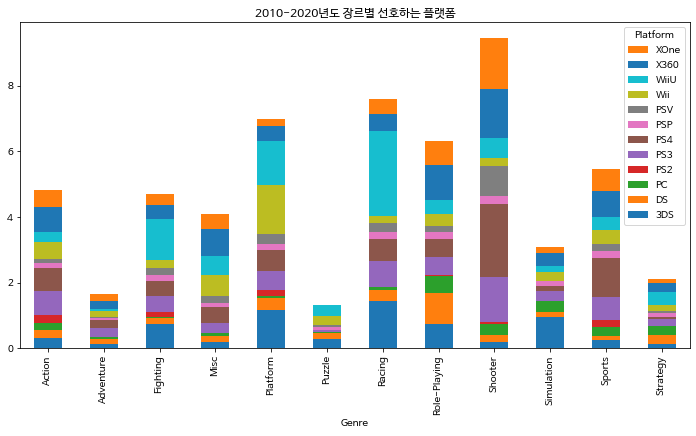

In [77]:
year_2010
wide6 = year_2010.pivot_table(index = 'Genre',columns = 'Platform',values = 'Total_Sales')

wide6.plot.bar(stacked = True,figsize = (12,6),legend = 'reverse',title = "2010-2020년도 장르별 선호하는 플랫폼")

In [78]:
b = pd.DataFrame(wide6.T.idxmax())
b.T

Genre Action Adventure Fighting  Misc  ... Shooter Simulation Sports Strategy
0       X360       PS3     WiiU  X360  ...     PS4        3DS    PS4     WiiU

[1 rows x 12 columns]

In [ ]:
##########

In [ ]:
############

# PCA & Clustering
- 이 데이터를 어떻게 활용할 수 있을까...


In [ ]:
# clustering PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

area_new = StandardScaler().fit_transform(area)
pca = PCA()
pcaDF = pca.fit_transform(area_new)

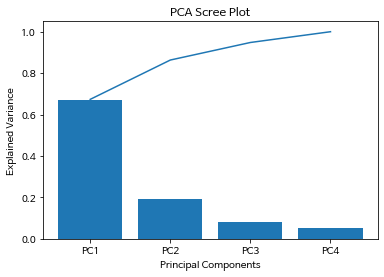

In [ ]:
ratio = pca.explained_variance_ratio_

# Scree plot 90% 이상의 내용을 설명하기 위한 Scree plot 찾기
import matplotlib.pyplot as plt
import numpy as np
per_var = np.round(ratio,decimals = 2)
columns = []
cum = np.cumsum(ratio) # 누적 합

for i in range(len(per_var)):
  columns.append(f'PC{i+1}') # 각 x 축의 이름

plt.bar(columns,per_var) # bar plot
plt.plot(columns,cum) # line plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
# pca결과와 장르를 합친 데이터 프레임 구축
principalDF = pd.DataFrame(pcaDF,columns = columns)
finalDF = df_new.join(principalDF) 
# finalDF = pd.concat([df_new,principalDF],axis = 1)
print(finalDF.shape)
finalDF.head()

(16241, 14)


Name Platform  ...       PC3       PC4
0                    Candace Kane's Candy Factory       DS  ... -0.014322  0.004039
1                                  The Munchables      Wii  ... -0.085320  0.099571
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...  0.034637 -0.017467
3                Deal or No Deal: Special Edition       DS  ... -0.014322  0.004039
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...  0.041266 -0.020969

[5 rows x 14 columns]

In [ ]:
# 90% 이상의 PCA 를 설명하기 위해 몇개의 PC가 필요한가.
count = 0
sum = 0
for i in range(len(ratio)):
  count += 1
  sum += ratio[i]
  if sum > 0.9:
    break
print(count)

3
